In [ ]:
# Import required libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Function to display images
def display_image(title, image):
    plt.figure(figsize=(10, 10))
    plt.title(title)
    plt.axis("off")
    if len(image.shape) == 3:
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(image, cmap="gray")
    plt.show()

In [ ]:
# Load sample image from the dataset
image_path = "image.jpg"
image = cv2.imread(image_path)

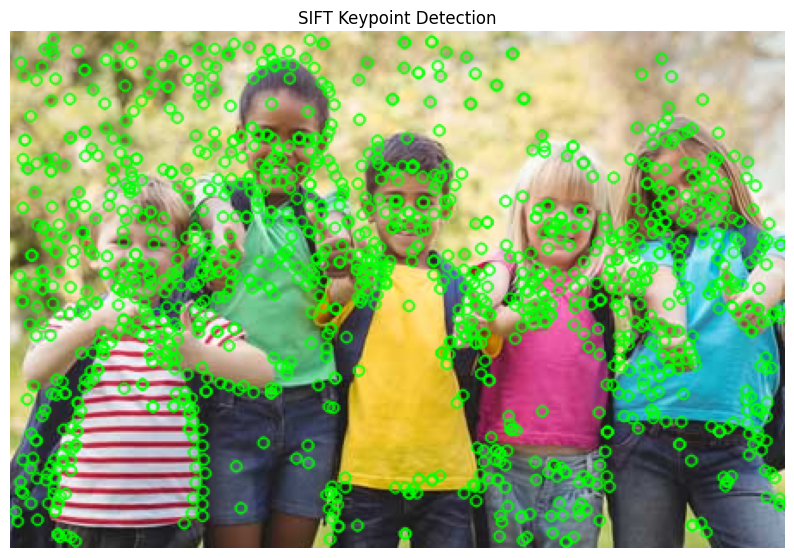

In [ ]:
# Phase 1: Feature Extraction with SIFT
sift = cv2.SIFT_create()
keypoints_sift, descriptors_sift = sift.detectAndCompute(image, None)
image_sift = cv2.drawKeypoints(image, keypoints_sift, None, color=(0, 255, 0))
display_image("SIFT Keypoint Detection", image_sift)

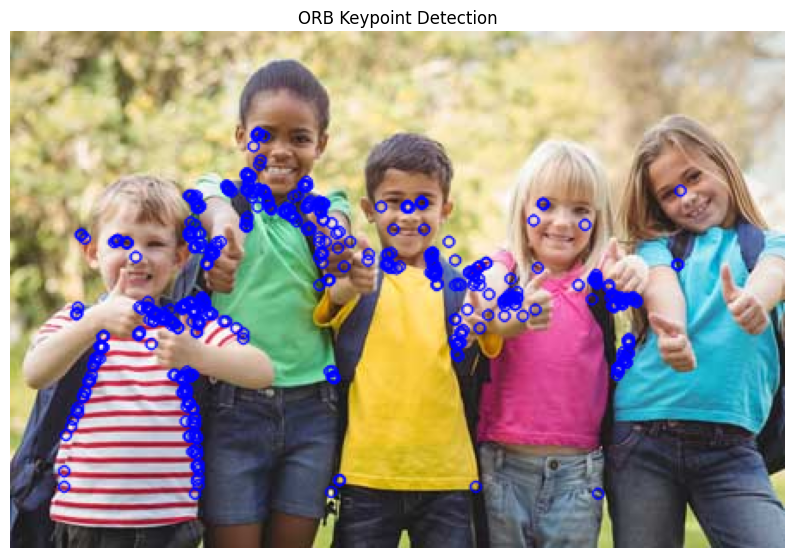

In [ ]:
# Phase 2: Feature Extraction with ORB
orb = cv2.ORB_create()
keypoints_orb, descriptors_orb = orb.detectAndCompute(image, None)
image_orb = cv2.drawKeypoints(image, keypoints_orb, None, color=(255, 0, 0))
display_image("ORB Keypoint Detection", image_orb)

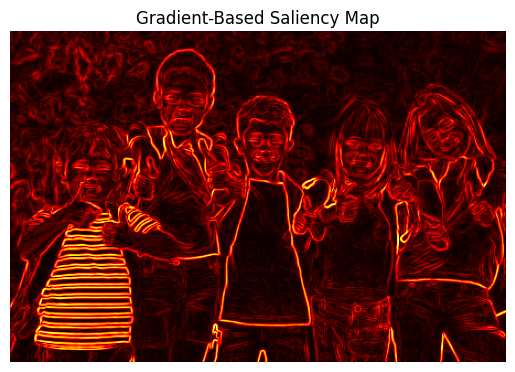

In [ ]:
from skimage.filters import sobel
from skimage.io import imread
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

# Load and preprocess image
grayscale_image = rgb2gray(image)

# Compute saliency using Sobel filter
saliency_map = sobel(grayscale_image)

# Display saliency map
plt.imshow(saliency_map, cmap='hot')
plt.title("Gradient-Based Saliency Map")
plt.axis('off')
plt.show()

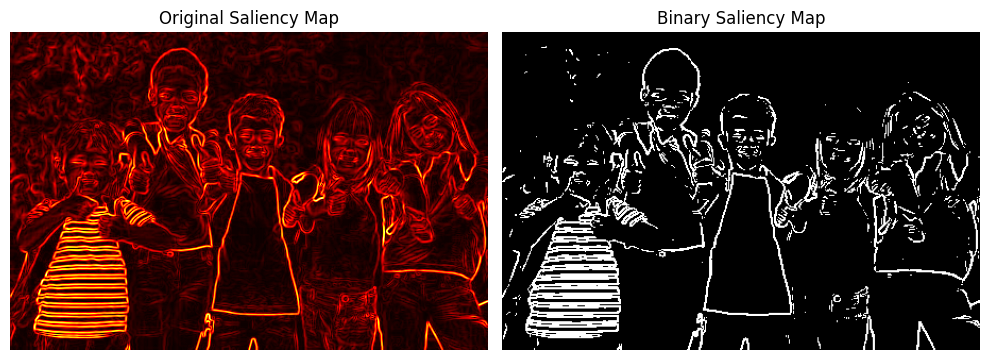

In [ ]:
from skimage.filters import threshold_otsu
from skimage import img_as_ubyte

# Convert saliency map to 8-bit (if necessary)
saliency_map_ubyte = img_as_ubyte(saliency_map)

# Compute the Otsu threshold
otsu_thresh = threshold_otsu(saliency_map_ubyte)

# Apply binary threshold
binary_map = saliency_map_ubyte > otsu_thresh

# Display the binary saliency map
plt.figure(figsize=(10, 5))

# Original Saliency Map
plt.subplot(1, 2, 1)
plt.imshow(saliency_map, cmap='hot')
plt.title("Original Saliency Map")
plt.axis('off')

# Binary Saliency Map
plt.subplot(1, 2, 2)
plt.imshow(binary_map, cmap='gray')
plt.title("Binary Saliency Map")
plt.axis('off')

plt.tight_layout()
plt.show()
